In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("Career_Stats_Receiving.csv")

In [3]:
players

,Player Id,Name,Position,Year,Team,Games Played,Receptions,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles
0,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Bears,3,1,-2,-2.0,-0.7,--,0,--,--,--,--
1,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Rockets,0,--,--,--,0.0,--,--,--,--,--,--
2,fredevans/2513736,"Evans, Fred",NaN,1947,Chicago Rockets,0,--,--,--,0.0,--,--,--,--,--,--
3,fredevans/2513736,"Evans, Fred",NaN,1947,Buffalo Bills,0,--,--,--,0.0,--,--,--,--,--,--
4,fredevans/2513736,"Evans, Fred",NaN,1946,Cleveland Browns,0,--,--,--,0.0,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18123,billanderson/2508534,"Anderson, Bill",NaN,1961,Washington Redskins,14,40,637,15.9,45.5,--,0,--,--,--,--
18124,billanderson/2508534,"Anderson, Bill",NaN,1960,Washington Redskins,12,38,488,12.8,40.7,--,3,--,--,--,--
18125,billanderson/2508534,"Anderson, Bill",NaN,1959,Washington Redskins,11,35,734,21.0,66.7,--,6,--,--,--,--
18126,billanderson/2508534,"Anderson, Bill",NaN,1958,Washington Redskins,12,18,396,22.0,33.0,--,2,--,--,--,--


In [40]:
features = ["Games Played", "Receptions", "Receiving Yards", "Yards Per Reception", "Receiving TDs"]
players.dtypes

Player Id                           object
Name                                object
Position                            object
Year                                 int64
Team                                object
Games Played                       float64
Receptions                          object
Receiving Yards                    float64
Yards Per Reception                 object
Yards Per Game                     float64
Longest Reception                   object
Receiving TDs                       object
Receptions Longer than 20 Yards     object
Receptions Longer than 40 Yards     object
First Down Receptions               object
Fumbles                             object
dtype: object

In [45]:
players[features] = players[features].replace('--', np.nan)
players = players.dropna(subset=features)
players[features] = players[features].replace(',', '', regex=True)
players[features] = players[features].astype(float)
players.dtypes
# for x in features:
#     players = players[(x >= 0).all(axis=1)]

Player Id                           object
Name                                object
Position                            object
Year                                 int64
Team                                object
Games Played                       float64
Receptions                         float64
Receiving Yards                    float64
Yards Per Reception                float64
Yards Per Game                     float64
Longest Reception                   object
Receiving TDs                      float64
Receptions Longer than 20 Yards     object
Receptions Longer than 40 Yards     object
First Down Receptions               object
Fumbles                             object
dtype: object

In [46]:
data = players[features].copy()

In [47]:
data

,Games Played,Receptions,Receiving Yards,Yards Per Reception,Receiving TDs
0,3.0,1.0,-2.0,-2.0,0.0
5,10.0,5.0,43.0,8.6,0.0
7,16.0,5.0,40.0,8.0,0.0
8,4.0,3.0,30.0,10.0,0.0
10,11.0,3.0,26.0,8.7,0.0
...,...,...,...,...,...
18123,14.0,40.0,637.0,15.9,0.0
18124,12.0,38.0,488.0,12.8,3.0
18125,11.0,35.0,734.0,21.0,6.0
18126,12.0,18.0,396.0,22.0,2.0


# start of k means implementation
1. Scale the data, so no one column dominates
2. Initialize random centroids
3. Label each data point
4. Update centroids
5. Repeat steps 3 and 4 until centroids stop changing

In [48]:
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1 # rescales to 1 - 10 scale

In [49]:
data.describe()

,Games Played,Receptions,Receiving Yards,Yards Per Reception,Receiving TDs
count,13479.000000,13479.000000,13479.000000,13479.000000,13479.000000
mean,7.647674,2.210460,2.214028,3.342343,1.635929
std,2.389280,1.346823,1.329557,0.505653,0.975235
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.400000,1.190141,1.267641,3.029245,1.000000
50%,8.200000,1.697183,1.689516,3.292453,1.409091
75%,10.000000,2.838028,2.678427,3.589623,1.818182
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [50]:
data.head()

,Games Played,Receptions,Receiving Yards,Yards Per Reception,Receiving TDs
0,2.2,1.000000,1.081653,2.188679,1.0
5,6.4,1.253521,1.285786,3.088679,1.0
7,10.0,1.253521,1.272177,3.037736,1.0
8,2.8,1.126761,1.226815,3.207547,1.0
10,7.0,1.126761,1.208669,3.097170,1.0


In [51]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

centroids = random_centroids(data, 5)
centroids

/var/folders/b2/j02bd25s2zv476_d230729200000gn/T/ipykernel_53639/2923639998.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
Games Played,9.400000,10.000000,10.000000,8.800000,1.600000
Receptions,1.063380,1.253521,1.000000,1.443662,5.309859
Receiving Yards,1.235887,1.349294,2.274698,1.172379,2.329133
Yards Per Reception,3.487736,3.190566,3.971698,3.190566,3.326415
Receiving TDs,1.000000,1.818182,5.090909,1.000000,1.000000


In [52]:
# Assigning points to centroid
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1) #  cluster assignment

In [53]:
labels = get_labels(data, centroids)
labels.value_counts()

3    6931
1    3006
4    1482
2    1200
0     860
Name: count, dtype: int64

In [54]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
# produces geometric mean of rows above by the clusters

In [55]:
# Turns 5 dimensional data into 2d data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [56]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T) # swithcing format
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

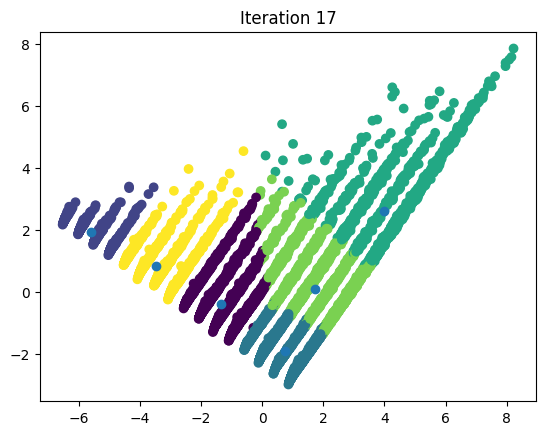

In [69]:
max_iterations = 100
k = 6
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [70]:
centroids

,0,1,2,3,4,5
Games Played,6.759927,1.947924,9.333211,9.438077,9.026138,4.333540
Receptions,1.469849,1.123887,1.485224,4.965786,3.055078,1.327704
Receiving Yards,1.542044,1.240870,1.478643,5.133689,2.888824,1.414438
Yards Per Reception,3.321270,3.226913,3.166100,3.568576,3.394611,3.268481
Receiving TDs,1.221150,1.055019,1.175616,3.450086,1.850326,1.143310


In [71]:
players[labels == 3][["Name"] + features]

,Name,Games Played,Receptions,Receiving Yards,Yards Per Reception,Receiving TDs
87,"Young, Titus",16.0,48.0,607.0,12.6,6.0
105,"Carlson, John",16.0,51.0,574.0,11.3,7.0
106,"Carlson, John",16.0,55.0,627.0,11.4,5.0
113,"Chambers, Chris",16.0,59.0,677.0,11.5,4.0
114,"Chambers, Chris",16.0,82.0,1118.0,13.6,11.0
...,...,...,...,...,...,...
18107,"Nicks, Hakeem",14.0,47.0,790.0,16.8,6.0
18115,"Smith, Torrey",16.0,49.0,767.0,15.7,11.0
18116,"Smith, Torrey",16.0,65.0,1128.0,17.4,4.0
18117,"Smith, Torrey",16.0,49.0,855.0,17.4,8.0
